In [1]:
# import libraries.
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
# self-made module
from Coupled_Lorenz_chaos import Coupled_Lorenz_Sys

import pandas as pd
import seaborn as sns
from scipy import signal
import nolds
import os

In [2]:
fig_dir = "../figure/Coupled_Lorenz_System"
os.makedirs(fig_dir, exist_ok=True)

In [3]:
nodes = 10
graph = nx.gnp_random_graph(n=nodes, p=0.6, seed=0, directed=False)
mat_C = np.asarray(nx.to_numpy_matrix(graph))
sys = Coupled_Lorenz_Sys(nodes)
sys.set_const(omega_cnst=10, r_cnst=28, b_cnst =8/3 , C_cnst = mat_C*0.1)

/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


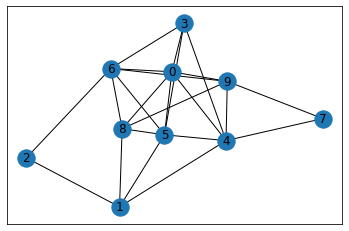

In [4]:
nx.draw_networkx(nx.from_numpy_array(sys.C))
path = os.path.join(fig_dir,  "graph_n_{}.png".format(nodes))
plt.savefig(path)
plt.show()

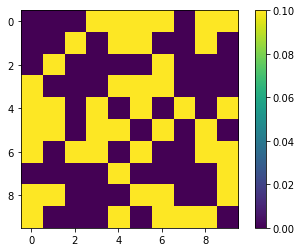

In [5]:
plt.imshow(sys.C)
plt.colorbar()
plt.show()

In [6]:
init_vec = np.random.uniform(-10, 10, size=(nodes, 3))
sys.set_init_state(init_vec)

In [7]:
# excute the numrical simulation.
XYZs, Ts = sys.solve(0.05, 1000)

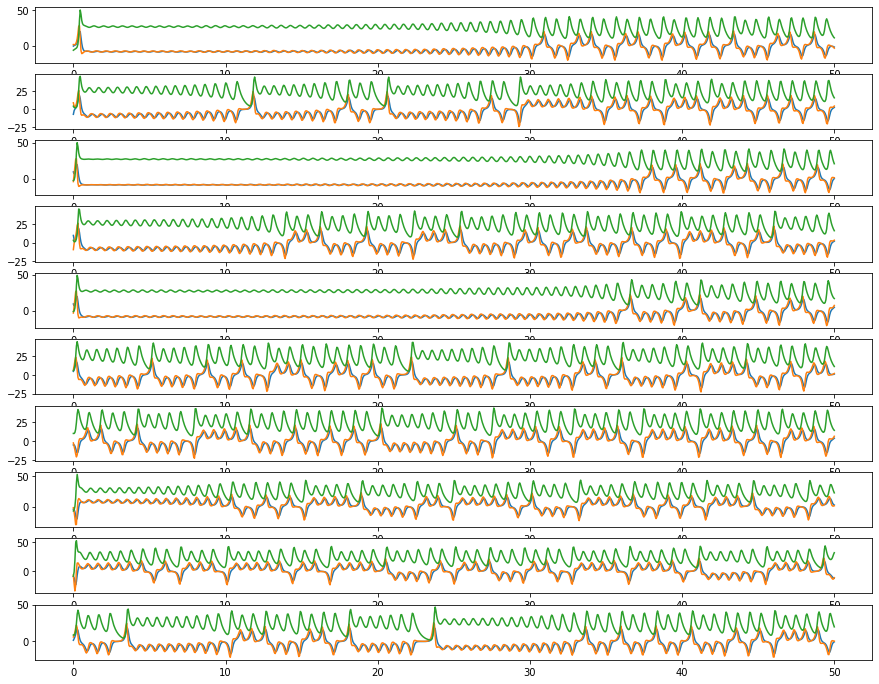

In [8]:
fig, ax = plt.subplots(sys.N_osc, 1, figsize=(15, 12))

for i in range(0, sys.N_osc):
    for j in range(0, 3):
        ax[i].plot(Ts, XYZs[i, j, :])

In [9]:
period= 0.05
freq = 1/ period
length = 5000
lyapnov_exs = []
corr_dims = []
emb_dim = np.arange(2, 25, 3)
start_step = 500
conne = 5
powspe= []
connes = np.array([0, 0.001, 0.01, 0.1, 1])
Xs = np.zeros((conne, nodes, length))

for ii, c_scale in enumerate(connes):
    print(ii, c_scale)
    
    sys.set_const(omega_cnst=10, r_cnst=28, b_cnst =8/3 , C_cnst = mat_C*c_scale)    
    init_vec = np.random.uniform(-10, 10, size=(nodes, 3))
    sys.set_init_state(init_vec)
    # excute the numrical simulation.
    XYZs, Ts = sys.solve(period,length)
    Xs[ii] = XYZs[:,0,:]
    spectrums = np.zeros((nodes, 3, np.floor((length-start_step)/2).astype(int)+1))
    for no in range(nodes):
        for ax in range(3):
            Freq, spectrums[no,ax] = signal.periodogram(XYZs[no, ax, start_step:], freq)
    powspe.append(spectrums)
          
    lyex_r = []
    corr = []

    for dim in emb_dim:
        ly = []
        co = []
        for no in range(nodes):
            co.append(nolds.corr_dim(XYZs[0, 0, start_step :], dim)) 
            ly.append(nolds.lyap_r(XYZs[0, 0, start_step :], dim))
        lyex_r.append(sum(ly)/nodes)
        corr.append(sum(co)/nodes)
    lyapnov_exs.append(lyex_r)
    corr_dims.append(corr)

0 0.0


/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 1125
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 1125
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 1125
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 1125
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7

/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 1125
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 1125
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 1125
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 1125
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7

/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 1125
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 1125
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 1125
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 1125
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7

1 0.001


/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 1125
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 1125
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 1125
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 1125
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7

/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 1125
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 1125
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 1125
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 1125
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7

/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 1125
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 1125
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 1125
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 1125
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7

2 0.01


/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 1125
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 1125
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 1125
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 1125
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7

/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 1125
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 1125
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 1125
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 1125
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7

/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 1125
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 1125
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 1125
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 1125
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7

3 0.1


/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 1125
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 1125
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 1125
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 1125
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7

/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 1125
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 1125
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 1125
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 1125
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7

/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 1125
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 1125
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 1125
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 1125
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7

4 1.0


/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 1125
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 1125
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 1125
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 1125
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7

/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 1125
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 316
  warnings.warn(msg.format(lag), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 1125
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 316
  warnings.warn(msg.format(lag), RuntimeWarning)
/home/akifuk

/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 1125
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 221
  warnings.warn(msg.format(lag), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 1125
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 170
  warnings.warn(msg.format(lag), RuntimeWarning)
/home/akifuk

/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 1125
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 139
  warnings.warn(msg.format(lag), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 1125
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 139
  warnings.warn(msg.format(lag), RuntimeWarning)
/home/akifuk

/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 1125
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 101
  warnings.warn(msg.format(lag), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 1125
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 101
  warnings.warn(msg.format(lag), RuntimeWarning)
/home/akifuk

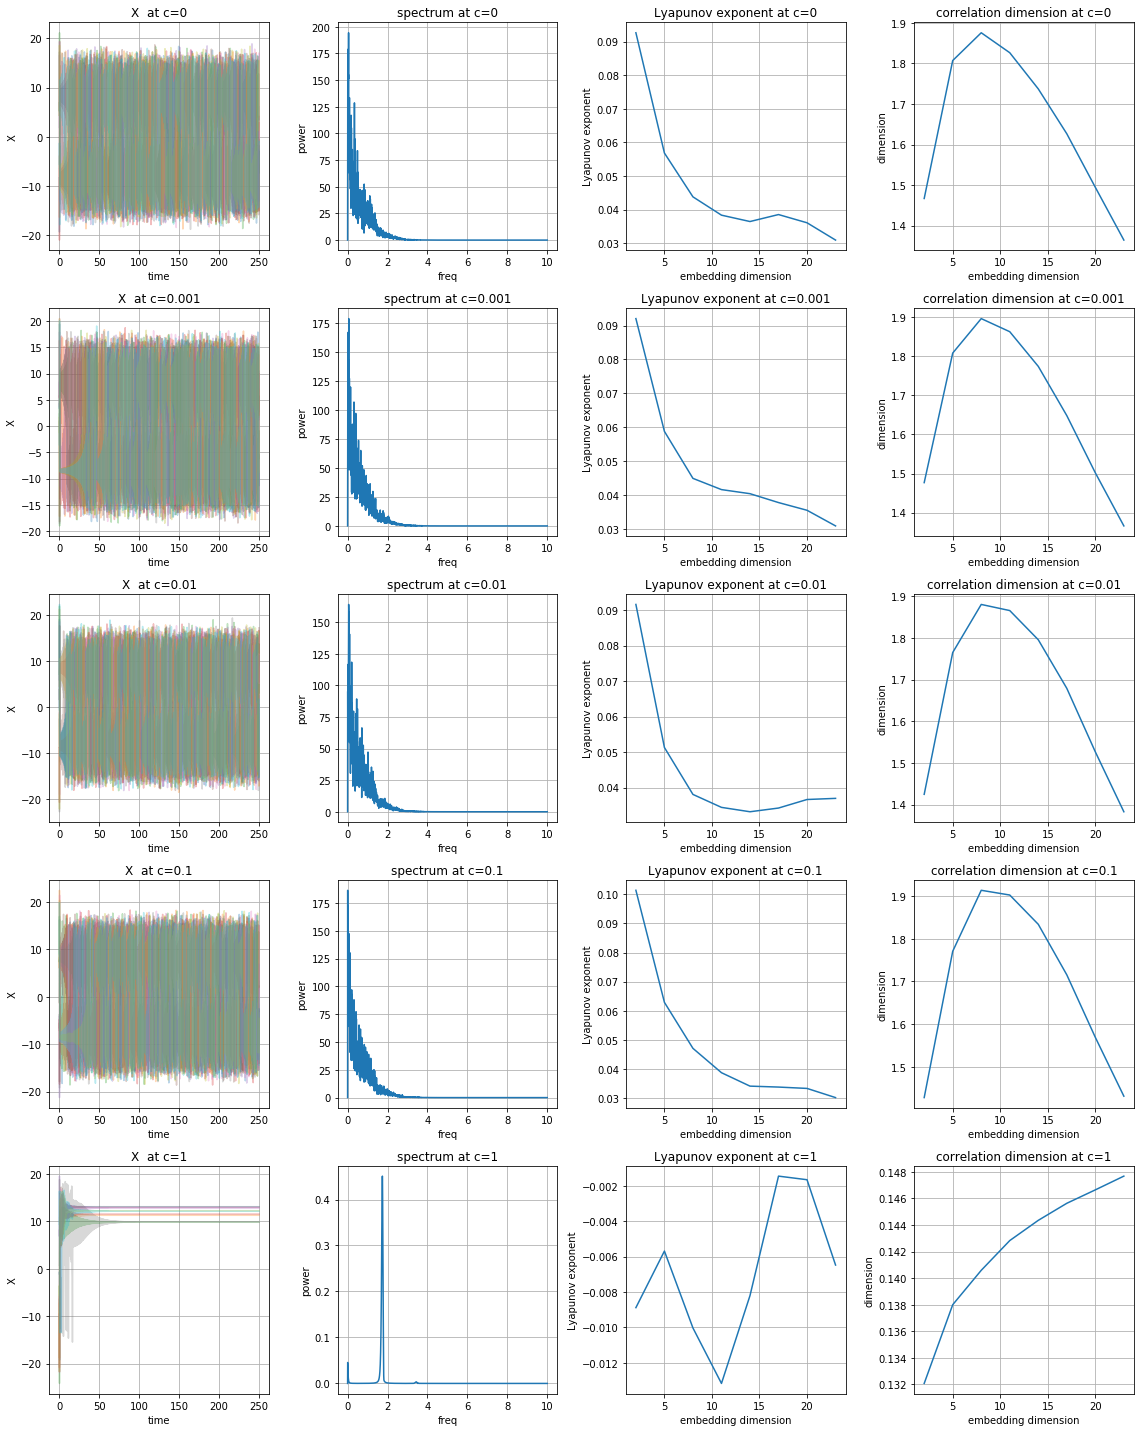

In [10]:
fig, ax = plt.subplots(conne, 4, figsize=(16,4*conne))
for i in range(0, conne):
    
    for n in range(nodes):
        ax[i,0].plot(Ts, Xs[i,n], alpha=0.3)
    ax[i,0].set_xlabel('time')
    ax[i,0].set_ylabel('X')
    ax[i,0].set_title("X  at c={:.3g}".format(connes[i]))
    ax[i,0].grid()
    
    ax[i,1].plot(Freq, powspe[i][:,0,:].mean(axis=0))
    ax[i,1].set_xlabel('freq')
    ax[i,1].set_ylabel('power')
    ax[i,1].set_title("spectrum at c={:.3g}".format(connes[i]))
    ax[i,1].grid()
    
    
    ax[i,2].plot(emb_dim,lyapnov_exs[i])
    ax[i,2].set_xlabel('embedding dimension')
    ax[i,2].set_ylabel("Lyapunov exponent")
    ax[i,2].set_title("Lyapunov exponent at c={:.3g}".format(connes[i]))
    ax[i,2].grid()
    
    
    ax[i,3].plot(emb_dim,corr_dims[i])
    ax[i,3].set_xlabel('embedding dimension')
    ax[i,3].set_ylabel("dimension")
    ax[i,3].set_title("correlation dimension at c={:.3g}".format(connes[i]))   
    ax[i,3].grid()
    
    

plt.tight_layout()
path = os.path.join(fig_dir, "figure_nodes_{}.png".format(nodes))
plt.savefig(path)
plt.show()


0 5


/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2375
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2375
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2375
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2375
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7

/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2375
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2375
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2375
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2375
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7

1 8


/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2375
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2375
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2375
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2375
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7

/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2375
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2375
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2375
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2375
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7

2 11


/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2375
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2375
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2375
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2375
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7

/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2375
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2375
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2375
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2375
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7

/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2375
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2375
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2375
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2375
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7

3 14


/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2375
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2375
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2375
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2375
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7

/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2375
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2375
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2375
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2375
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7

/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2375
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2375
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2375
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2375
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7

/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2375
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2375
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2375
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2375
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7

4 17


/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2375
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2375
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2375
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2375
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7

/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2375
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2375
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2375
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2375
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7

/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2375
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2375
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2375
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2375
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7

/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2375
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2375
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2375
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7.4/envs/env_simulations/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2375
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/akifukuchi/.pyenv/versions/3.7

(5, 10000)


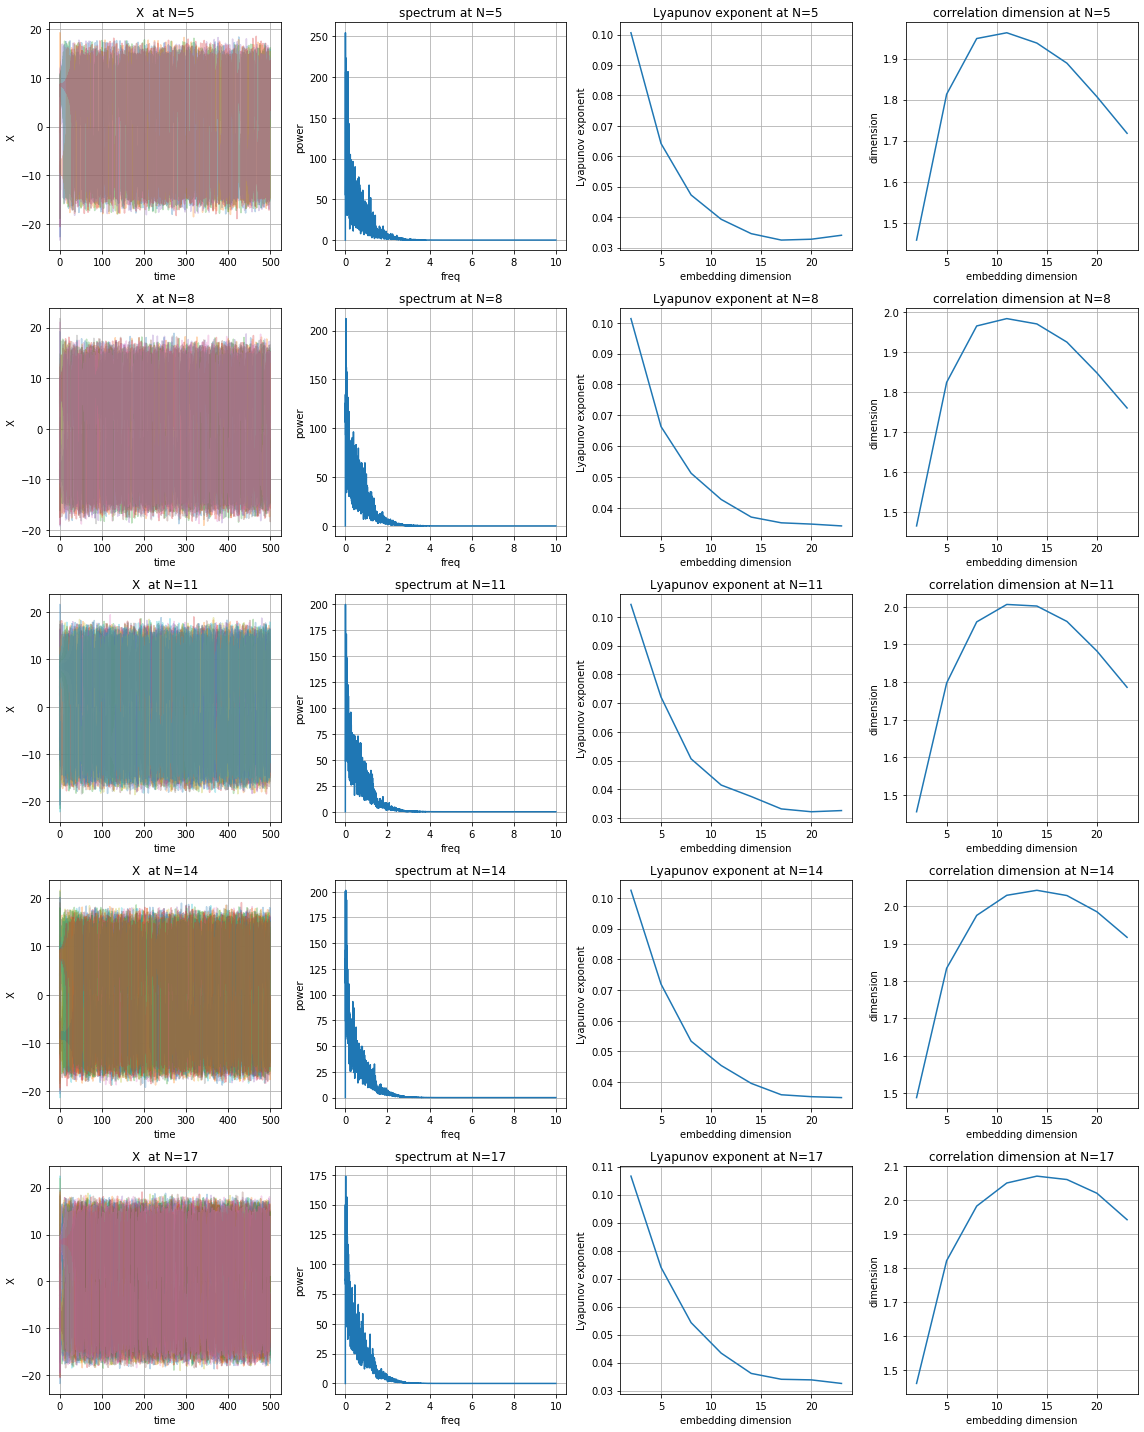

In [11]:
period= 0.05
freq = 1/ period
length = 10000
lyapnov_exs = []
corr_dims = []
emb_dim = np.arange(2, 25,3)
start_step = 500
powspe= []
nodes_list = np.arange(5, 20, 3)
Xs = []

for ii, nodes in enumerate(nodes_list):
    print(ii, nodes)
    graph = nx.gnp_random_graph(n=nodes, p=0.6, seed=0, directed=False)
    mat_C = np.asarray(nx.to_numpy_matrix(graph))
    sys = Coupled_Lorenz_Sys(nodes)
    sys.set_const(omega_cnst=10, r_cnst=28, b_cnst =8/3 , C_cnst = mat_C*0.1)
    init_vec = np.random.uniform(-10, 10, size=(nodes, 3))
    sys.set_init_state(init_vec)
    # excute the numrical simulation.
    XYZs, Ts = sys.solve(period,length)
    Xs.append( XYZs[:,0,:])
    spectrums = np.zeros((nodes, 3, np.floor((length-start_step)/2).astype(int)+1))
    for no in range(nodes):
        for ax in range(3):
            Freq, spectrums[no, ax] = signal.periodogram(XYZs[no, ax, start_step:], freq)
    powspe.append(spectrums)
          
    lyex_r = []
    corr = []

    for dim in emb_dim:
        ly = []
        co = []
        for no in range(nodes):
            co.append(nolds.corr_dim(XYZs[0, 0, start_step :], dim)) 
            ly.append(nolds.lyap_r(XYZs[0, 0, start_step :], dim))
        lyex_r.append(sum(ly)/nodes)
        corr.append(sum(co)/nodes)
    lyapnov_exs.append(lyex_r)
    corr_dims.append(corr)
    
print(Xs[0].shape)
fig, ax = plt.subplots(len(nodes_list),  4, figsize=(16,4*len(nodes_list)))

for i in range( len(nodes_list)):
    for n in range(nodes_list[i]):
        ax[i,0].plot(Ts, Xs[i][n], alpha=0.3)
    ax[i,0].set_xlabel('time')
    ax[i,0].set_ylabel('X')
    ax[i,0].set_title("X  at N={:.3g}".format(nodes_list[i]))
    ax[i,0].grid()
    
    ax[i,1].plot(Freq, powspe[i][:,0,:].mean(axis=0))
    ax[i,1].set_xlabel('freq')
    ax[i,1].set_ylabel('power')
    ax[i,1].set_title("spectrum at N={:.3g}".format(nodes_list[i]))
    ax[i,1].grid()
    
    
    ax[i,2].plot(emb_dim,lyapnov_exs[i])
    ax[i,2].set_xlabel('embedding dimension')
    ax[i,2].set_ylabel("Lyapunov exponent")
    ax[i,2].set_title("Lyapunov exponent at N={:.3g}".format(nodes_list[i]))
    ax[i,2].grid()
    
    
    ax[i,3].plot(emb_dim,corr_dims[i])
    ax[i,3].set_xlabel('embedding dimension')
    ax[i,3].set_ylabel("dimension")
    ax[i,3].set_title("correlation dimension at N={:.3g}".format(nodes_list[i]))
    ax[i,3].grid()
    
    

plt.tight_layout()
path = os.path.join(fig_dir, "figure_cone_01.png")
plt.savefig(path)
plt.show()


In [12]:
max_corr_dim = [np.max(corr)for corr in corr_dims]

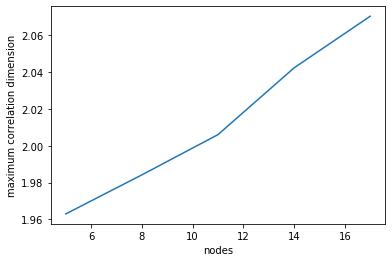

In [17]:
plt.plot(nodes_list, max_corr_dim)
plt.xlabel("nodes")
plt.ylabel("maximum correlation dimension")
path = os.path.join(fig_dir, "max_corr_to_nodes.png")
plt.savefig(path)
plt.show()